In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:23<00:00, 252MB/s]
100% 2.70G/2.70G [00:23<00:00, 123MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Data Preprocessing

Training Image preprocessing

In [ ]:

training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.



Validation Image Preprocessing

In [ ]:

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


To avoid Overshooting Loss function

1.Choose small learning rate default 0.001 here we have taken 0.0001
2.There may be chance of underfitting so increase number of neuron
3.Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

---



Building Model

In [ ]:
from tensorflow.keras.layers import Dense,Convolution2D
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()


Building Convolution Layer

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(tf.keras.layers.Dropout(0.25)) #To avoid Overfitting

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
#Output Layer
model.add(tf.keras.layers.Dense(units=38,activation='softmax'))


Compiling and Training Phase

In [ ]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

Model Training

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 171s 74ms/step - loss: 1.3986 - accuracy: 0.5889 - val_loss: 0.5200 - val_accuracy: 0.8446
Epoch 2/10
2197/2197 [==============================] - 159s 72ms/step - loss: 0.4545 - accuracy: 0.8555 - val_loss: 0.3173 - val_accuracy: 0.8976
Epoch 3/10
2197/2197 [==============================] - 160s 73ms/step - loss: 0.2726 - accuracy: 0.9115 - val_loss: 0.2126 - val_accuracy: 0.9296
Epoch 4/10
2197/2197 [==============================] - 159s 72ms/step - loss: 0.1887 - accuracy: 0.9387 - val_loss: 0.2041 - val_accuracy: 0.9354
Epoch 5/10
2197/2197 [==============================] - 168s 76ms/step - loss: 0.1402 - accuracy: 0.9540 - val_loss: 0.2020 - val_accuracy: 0.9362
Epoch 6/10
2197/2197 [==============================] - 159s 72ms/step - loss: 0.1086 - accuracy: 0.9648 - val_loss: 0.1725 - val_accuracy: 0.9453
Epoch 7/10
2197/2197 [==============================] - 159s 72ms/step - loss: 0.0892 - accuracy: 0.9701 - val_loss: 0

Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print(train_loss, train_acc)

2197/2197 [==============================] - 50s 23ms/step - loss: 0.0597 - accuracy: 0.9813
0.059708867222070694 0.9812646508216858


In [ ]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print(val_loss,val_acc)

550/550 [==============================] - 13s 24ms/step - loss: 0.1556 - accuracy: 0.9523
0.1555873155593872 0.9522535800933838



Saving Model

In [ ]:
model.save('trained_plant_disease_model.keras')

In [ ]:
training_history.history

{'loss': [1.3985971212387085,
  0.45453062653541565,
  0.27256229519844055,
  0.18871474266052246,
  0.14015495777130127,
  0.10855300724506378,
  0.08919388055801392,
  0.07770171761512756,
  0.06255978345870972,
  0.05605172738432884],
 'accuracy': [0.5889323353767395,
  0.8555373549461365,
  0.9115299582481384,
  0.9386869668960571,
  0.9540223479270935,
  0.9648196697235107,
  0.9700974225997925,
  0.9751333594322205,
  0.979714035987854,
  0.9816487431526184],
 'val_loss': [0.520043671131134,
  0.31732094287872314,
  0.21261870861053467,
  0.2041456401348114,
  0.20202462375164032,
  0.17252475023269653,
  0.1285010427236557,
  0.11955159902572632,
  0.11997848749160767,
  0.15558727085590363],
 'val_accuracy': [0.8446391820907593,
  0.8975642919540405,
  0.9296039342880249,
  0.9353516697883606,
  0.9362053275108337,
  0.9452537894248962,
  0.9627817273139954,
  0.9642613530158997,
  0.9640336632728577,
  0.9522535800933838]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])



Accuracy Visualization

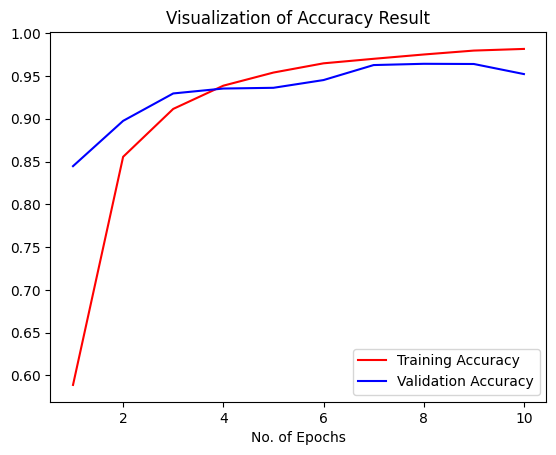

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

17572/17572 [==============================] - 51s 3ms/step


(array([[9.9999988e-01, 1.7622433e-07, 9.3094358e-13, ..., 9.1429969e-18,
         5.9520297e-17, 1.0610037e-15],
        [1.0000000e+00, 5.6774105e-09, 6.2245538e-13, ..., 2.7997121e-18,
         6.2597230e-17, 4.1901113e-16],
        [1.0000000e+00, 8.2720332e-12, 2.7959369e-16, ..., 4.2762143e-22,
         2.1959416e-20, 2.6717485e-18],
        ...,
        [4.9799581e-08, 1.9816642e-09, 2.6203970e-06, ..., 1.9870054e-08,
         8.2060687e-08, 9.9989378e-01],
        [1.8750090e-09, 6.8614051e-12, 9.4890114e-09, ..., 4.0855791e-10,
         2.9241565e-10, 9.9999785e-01],
        [1.9255304e-14, 8.3249956e-15, 6.0245228e-13, ..., 5.7482828e-15,
         6.1149822e-14, 9.9999988e-01]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

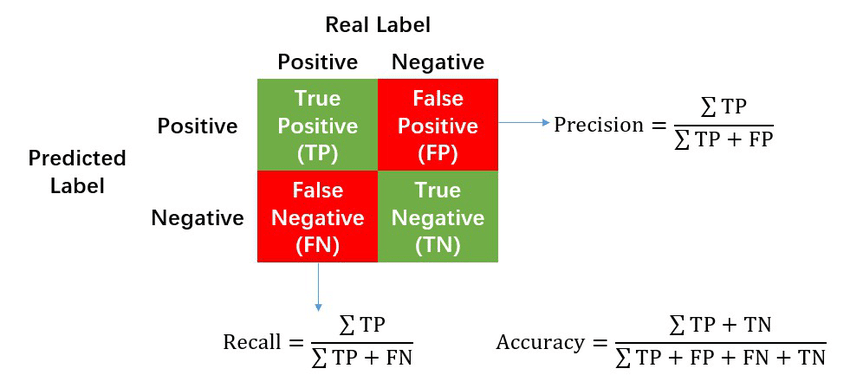

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.96      0.96       504
                                 Apple___Black_rot       1.00      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.99      0.91      0.95       502
                               Blueberry___healthy       0.91      0.98      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.91      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[484,   0,   0, ...,   0,   0,   0],
       [  2, 475,   0, ...,   0,   0,   0],
       [  1,   0, 417, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 480,   1,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   0, 479]])

Confusion Matrix Visualization

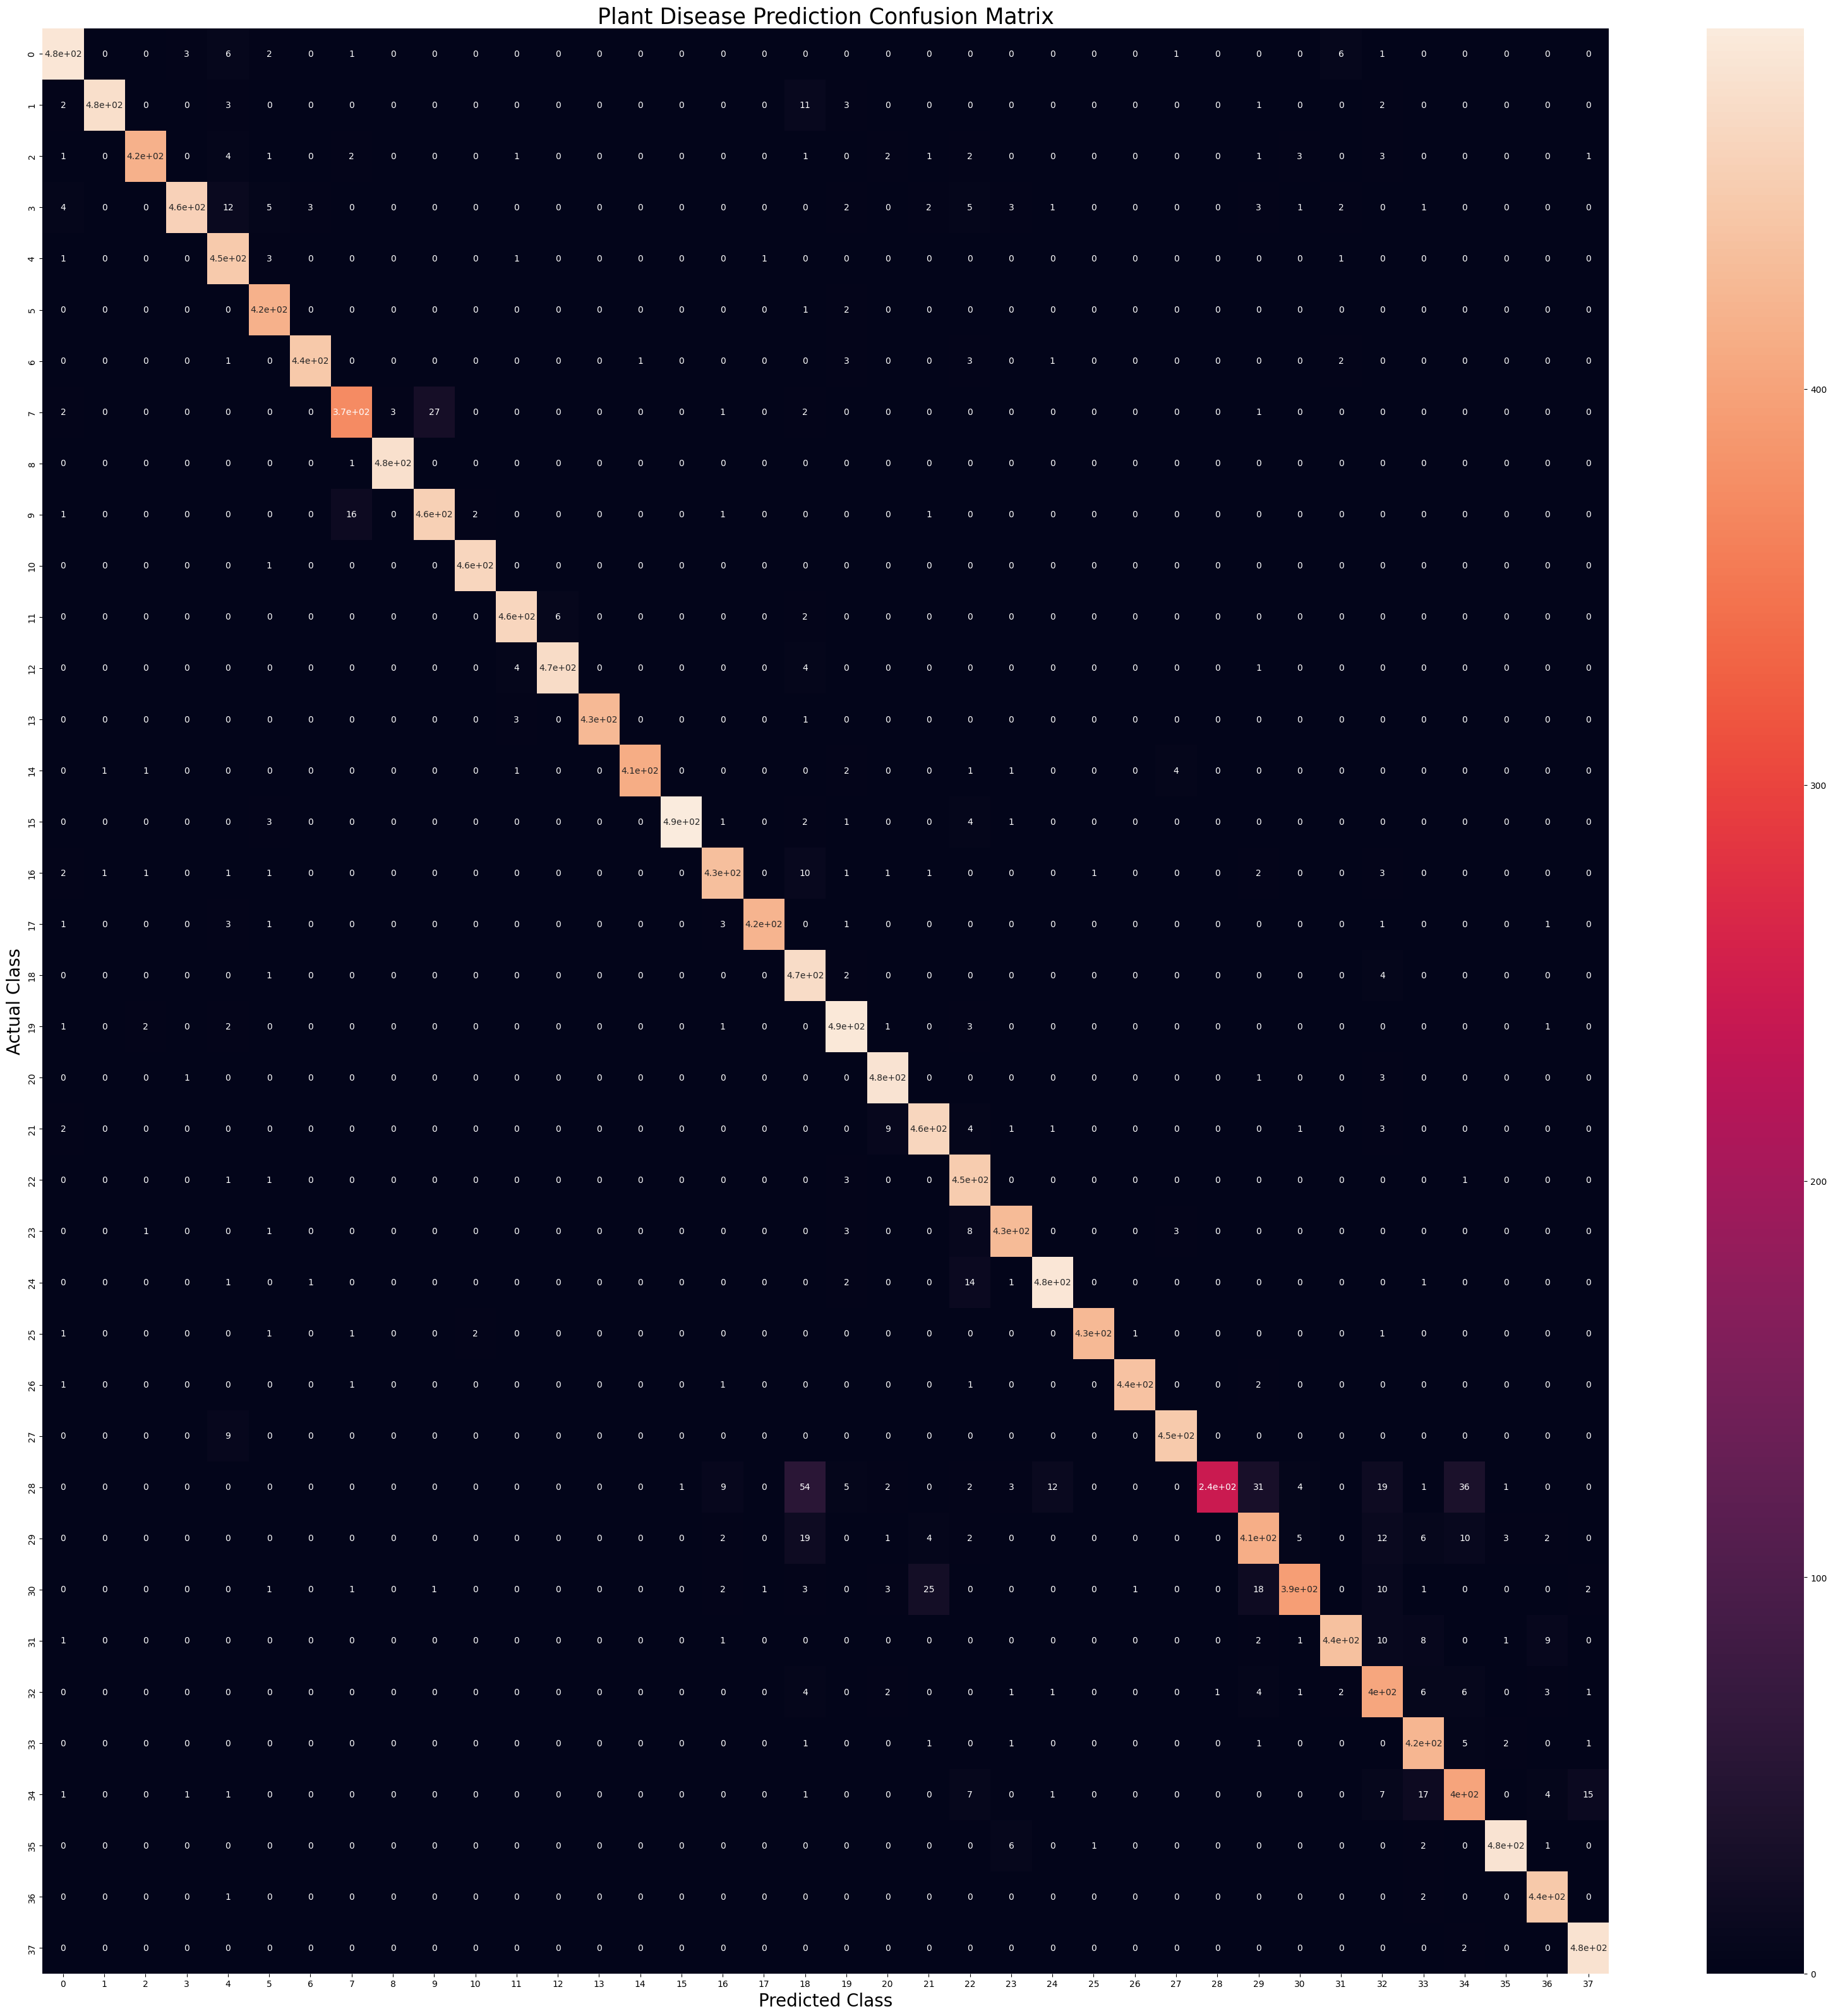

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()